#  Intern Performance Tracker (HR Analytics Project)

**Objective:**  
Analyze intern feedback, workload, and satisfaction metrics to detect burnout and predict attrition risk using real HR-style data.

**Tools Used:**  
pandas, TextBlob (sentiment analysis), matplotlib, Streamlit

**Dataset:** Based on IBM HR Analytics Employee Attrition Dataset, adapted for intern simulation.
"""

**load dataset**

In [12]:
import pandas as pd 
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Step 1: Filter "Interns"
We treat interns as:

Young employees (Age ≤ 25)

OR recently joined (YearsAtCompany ≤ 1)

In [15]:
df_interns = df[(df['Age'] <= 25) | (df['YearsAtCompany'] <= 1)].copy()
df_interns.reset_index(drop=True, inplace=True)
df_interns.shape


(293, 35)

# step 2: Add Simulated Feedback Column
Because IBM dataset has no text, we create it for sentiment analysis.

In [26]:
sample_feedback = [
    "Loving the work and learning fast.",
    "Feeling overworked and exhausted.",
    "Workload is balanced and the team is helpful.",
    "Deadlines are too tight, very stressful.",
    "Great experience, excited for new tasks."
]

# Repeat and match exactly to intern data length
feedback_repeated = (sample_feedback * ((len(df_interns) // len(sample_feedback)) + 1))[:len(df_interns)]
df_interns['Feedback'] = feedback_repeated


In [28]:
'Feedback' in df_interns.columns


True

In [30]:
df_interns.tail(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Feedback
290,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,2018,...,80,1,6,3,2,5,3,0,4,Loving the work and learning fast.
291,21,No,Travel_Rarely,501,Sales,5,1,Medical,1,2021,...,80,0,2,6,3,2,2,1,2,Feeling overworked and exhausted.
292,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,80,1,1,3,2,1,0,1,0,Workload is balanced and the team is helpful.


In [32]:
df_interns[['EmployeeNumber', 'Feedback']].head(10)


,EmployeeNumber,Feedback
0,4,Loving the work and learning fast.
1,10,Feeling overworked and exhausted.
2,11,Workload is balanced and the team is helpful.
3,22,"Deadlines are too tight, very stressful."
4,26,"Great experience, excited for new tasks."
5,30,Loving the work and learning fast.
6,39,Feeling overworked and exhausted.
7,42,Workload is balanced and the team is helpful.
8,45,"Deadlines are too tight, very stressful."
9,51,"Great experience, excited for new tasks."


# Step 3: Sentiment Analysis
We’ll use TextBlob to get sentiment polarity.

In [41]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_interns['Sentiment'] = df_interns['Feedback'].apply(get_sentiment)


In [ ]:
Step 4: Burnout Detection Logic
We define burnout as:

Negative sentiment (< 0)

AND OverTime is Yes

In [45]:
df_interns['Burnout'] = df_interns.apply(
    lambda x: 1 if x['Sentiment'] < 0 and x['OverTime'] == 'Yes' else 0,
    axis=1
)


# Step 5: Attrition Risk Logic
Create a simple rule:

Low job satisfaction (≤ 2)

Burnout == 1 → high attrition risk

In [47]:
df_interns['AttritionRisk'] = df_interns.apply(
    lambda x: 1 if x['JobSatisfaction'] <= 2 and x['Burnout'] == 1 else 0,
    axis=1
)


# Step 6: Visual Analysis

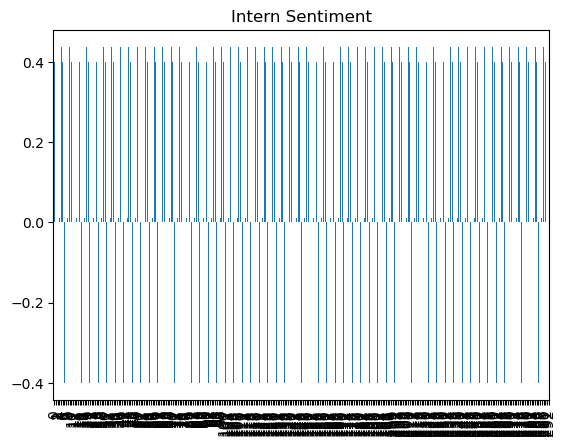

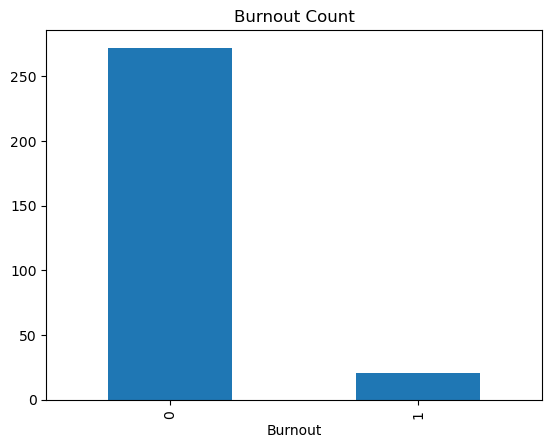

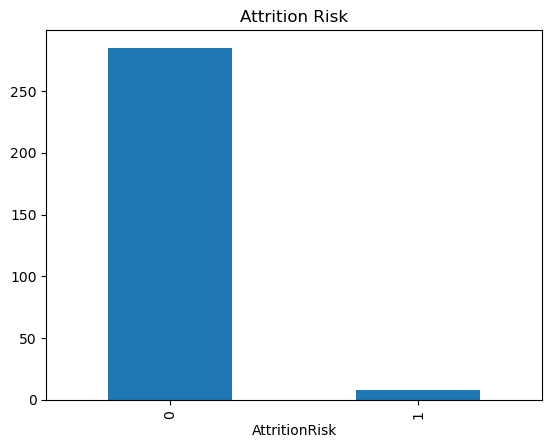

In [52]:
import matplotlib.pyplot as plt

df_interns['Sentiment'].plot(kind='bar', title='Intern Sentiment')
plt.show()

df_interns['Burnout'].value_counts().plot(kind='bar', title='Burnout Count')
plt.show()

df_interns['AttritionRisk'].value_counts().plot(kind='bar', title='Attrition Risk')
plt.show()


# Step 7: Dashboard with Streamlit

In [1]:
import os
os.getcwd()


'/Users/hrithik'